In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.output = nn.Linear(256, output_size)

    def forward(self, x):
        # [batch, channel, width, height]
        x = x.view(x.shape[0], -1) # [32 , channel X width X height]
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


In [ ]:
from torch.utils import data
# step2: Data preparation - MNIST
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Download dataset
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

full_data = datasets.MNIST('./data', download=True, transform=transform)

train_size = int(len(full_data) * 0.7)
val_size = int(len(full_data) * 0.1)
# Deduct the sum of train_size and val_size from total size for test_size
test_size = len(full_data) - train_size - val_size

# Now, you can be sure that train_size + test_size + val_size == len(full_data)
train_set, test_set, val_set = random_split(full_data, [train_size, test_size, val_size])
print(len(train_set), len(test_set), len(val_set))

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 102723544.96it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28309346.54it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25550441.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4528293.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

42000 12000 6000


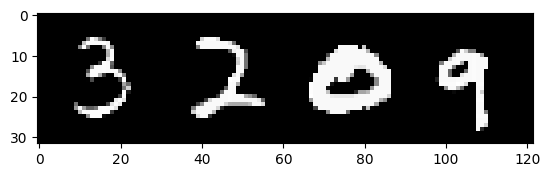

In [ ]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Move the images to cpu
generated_images = images[:4]

# Create a grid of images and convert it to numpy
grid = torchvision.utils.make_grid(generated_images, nrow=8)
npimg = grid.numpy()

# Plot the grid of images
# Plot the images
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [ ]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 1, 28, 28]) torch.Size([32])


In [ ]:

model = MLP(input_size=28*28, output_size=10)

# training loop
loss_func = nn.CrossEntropyLoss()

model.train()
# Specify the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
n_epochs = 1
for epoch in range(n_epochs):
  for images, labels in train_loader:
    y_preds = model(images)
    # why ? loss -negative log likely hood
    # logits
    #y_preds = F.softmax(y_preds)
    # loss calculation
    loss = loss_func(y_preds, labels)
    # zero the gradients
    optimizer.zero_grad()
    # calculate graidents
    loss.backward()
    # update weights
    optimizer.step()
    # Print the loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 2.3093857765197754
Epoch 1, Loss: 7.65873908996582
Epoch 1, Loss: 6.9490814208984375
Epoch 1, Loss: 7.60952091217041
Epoch 1, Loss: 5.834691047668457
Epoch 1, Loss: 6.273827075958252
Epoch 1, Loss: 5.857743740081787
Epoch 1, Loss: 3.9135167598724365
Epoch 1, Loss: 2.0259976387023926
Epoch 1, Loss: 2.211691379547119
Epoch 1, Loss: 2.3687186241149902
Epoch 1, Loss: 1.902200698852539
Epoch 1, Loss: 1.875106930732727
Epoch 1, Loss: 1.9243232011795044
Epoch 1, Loss: 1.90288507938385
Epoch 1, Loss: 1.724904179573059
Epoch 1, Loss: 1.7188293933868408
Epoch 1, Loss: 1.745814561843872
Epoch 1, Loss: 1.7305066585540771
Epoch 1, Loss: 1.550849199295044
Epoch 1, Loss: 1.408385992050171
Epoch 1, Loss: 1.407047152519226
Epoch 1, Loss: 1.6987663507461548
Epoch 1, Loss: 1.3105337619781494
Epoch 1, Loss: 1.216254711151123
Epoch 1, Loss: 1.2725915908813477
Epoch 1, Loss: 1.813842535018921
Epoch 1, Loss: 1.4194753170013428
Epoch 1, Loss: 1.0686252117156982
Epoch 1, Loss: 1.4102015495300293

In [ ]:
# Set the model to evaluation mode
def testloop(model):
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
      for images, labels in test_loader:
          # Forward pass
          output = model(images)

          # Calculate loss
          loss = loss_func(output, labels)

          # Update test loss
          test_loss += loss.item()*images.size(0)

          # Convert output probabilities to predicted class
          _, preds = torch.max(output, 1)

          # Compare predictions to true label
          correct += (preds == labels).sum().item()

  # Calculate average losses
  test_loss = test_loss/len(test_loader.dataset)

  print('Test Loss: {:.6f}\n'.format(test_loss))

  # Calculate accuracy
  accuracy = correct / len(test_loader.dataset)

  print('\nTest Accuracy: {:.3f} ({}/{})'.format(accuracy, correct, len(test_loader.dataset)))

In [ ]:
testloop(model)

Test Loss: 0.453790


Test Accuracy: 0.875 (10500/12000)


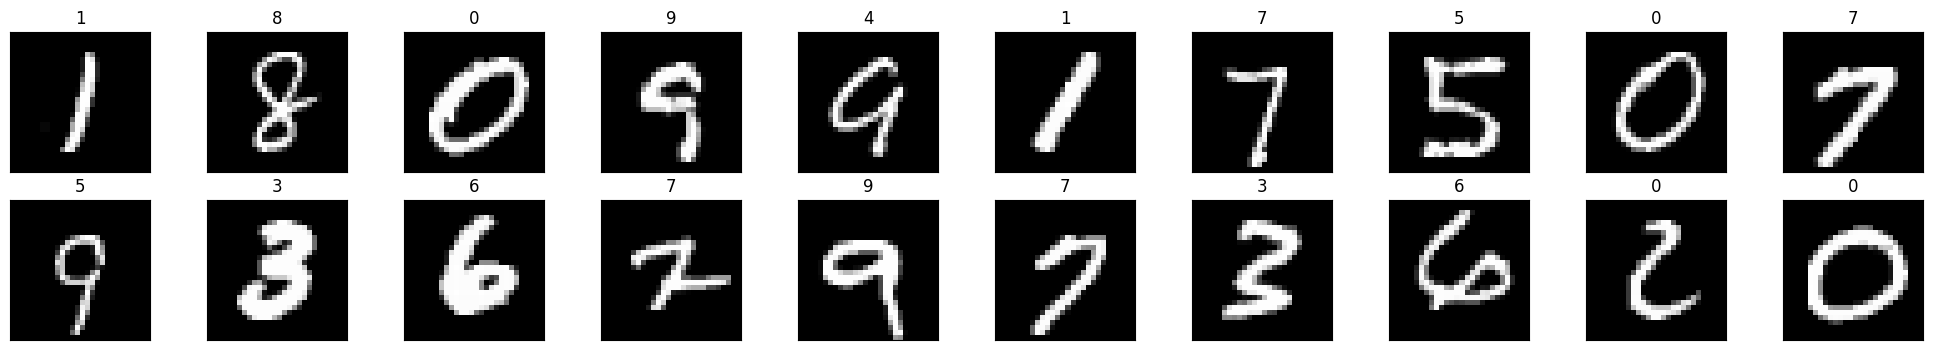

In [ ]:

import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Get a batch of images and labels from the test loader
images, labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the images in the batch, along with predicted labels
fig = plt.figure(figsize=(25, 4))

for idx in range(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(str(predicted[idx].item()))